 Day91-92 Drug Classification w/ various model    By: Loga Aswin

**Importing Libraries**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Datasets:**

In [43]:
df=pd.read_csv("/content/drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


**checking null in dataset:**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**Initial Dataset Exploration**

**Categorical Variables:**

In [45]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

**From Result, DrugY has more amount than other types of drugs...**

In [46]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

**The distribution of patient gender is balanced.**

In [47]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

**distribution of blood pressure level is balanced.**

In [48]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

** The distribution of cholesterol level is balanced.**

**Numerical Variables**

In [49]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


**EDA**

**1. Drug Type Distribution**

<ipython-input-50-33cdc98d61e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Drug", data=df, palette="flare")


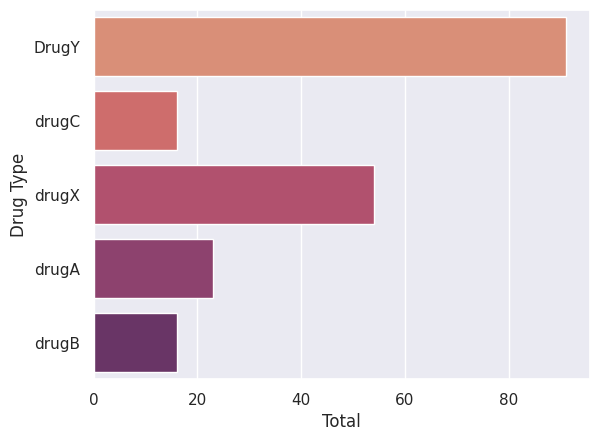

In [50]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

**2. Gender Distribution**

<ipython-input-51-dfca3589a375>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="rocket")


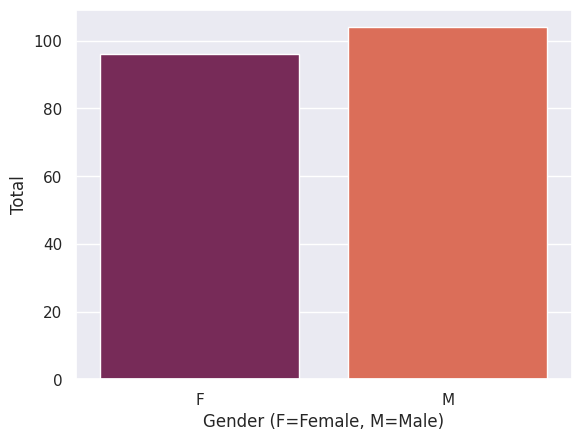

In [51]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

**3. Blood Pressure Distribution**

<ipython-input-52-4cad95c4e78a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="BP", data=df, palette="crest")


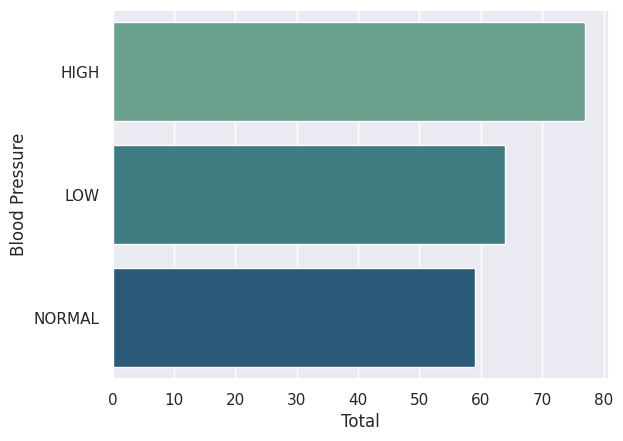

In [52]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

**4. Cholesterol Distribution**

<ipython-input-53-5875d239b51c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cholesterol", data=df, palette="magma")


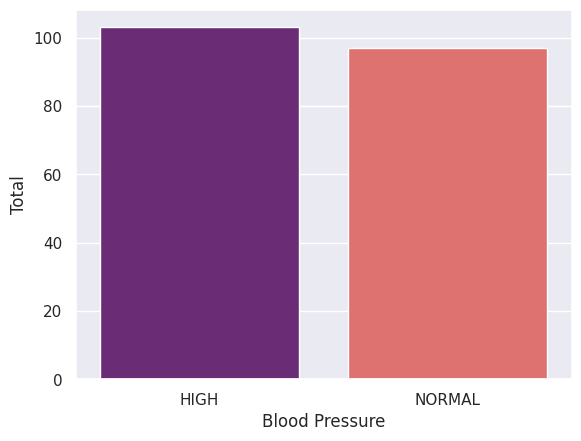

In [53]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

**5. Gender Distribution based on Drug Type**

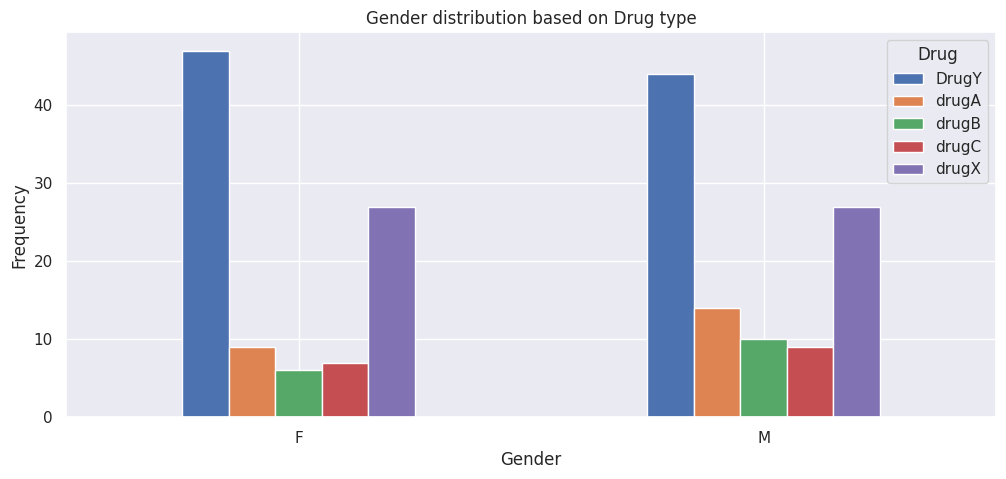

In [54]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5))
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**6. Blood Pressure Distribution based on Cholesetrol**

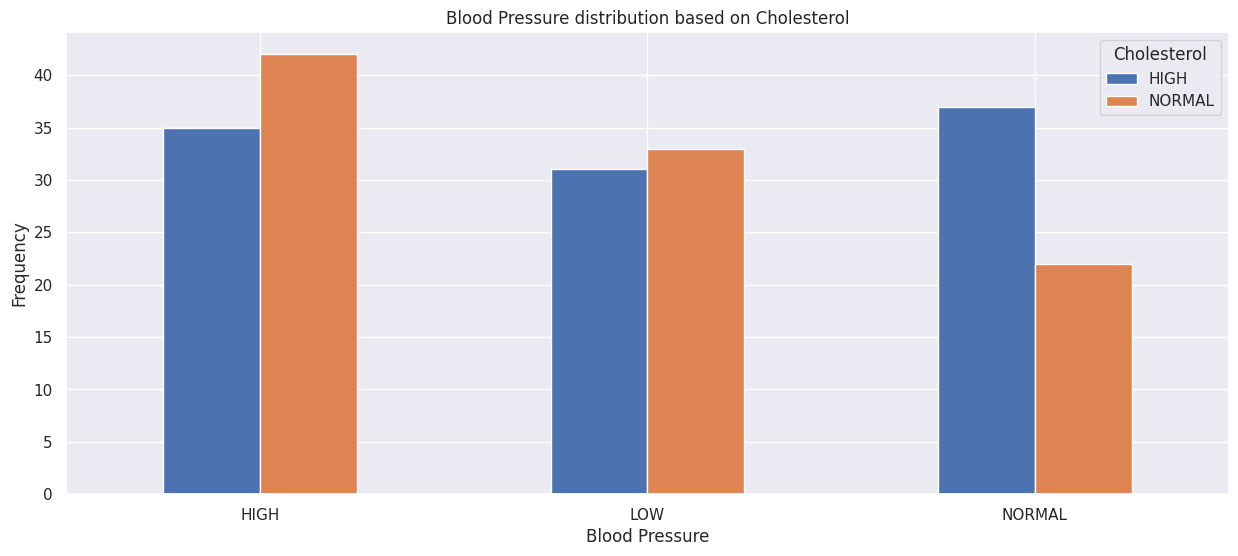

In [55]:
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(15,6))
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**7. Sodium to Potassium Distribution based on Gender and Age**

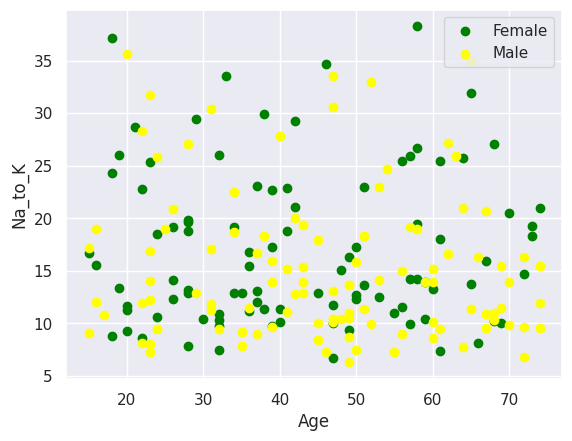

In [56]:
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="Green")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="yellow")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

**Dataset Preparation**

**Data Binning**

**Age**

Now, the age will be divided into 7 age categories:

Below 20 ,
20 - 29 ,
30 - 39 ,
40 - 49 ,
50 - 59 ,
60 - 69 ,
Above 70.

In [57]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

**Na_to_K**

Now,the chemical ratio will be divided into 4 categories:

Below 10,
10 - 20,
20 - 30,
Above 30.

In [58]:
NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

**Splitting the dataset**

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [60]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Feature Engineering(one-hot encoding)**

In [61]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [62]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [63]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
98,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


**SMOTE Technique** : Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting.

In [64]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

<ipython-input-65-241dde5c9a3a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_train, data=df, palette="mako_r")


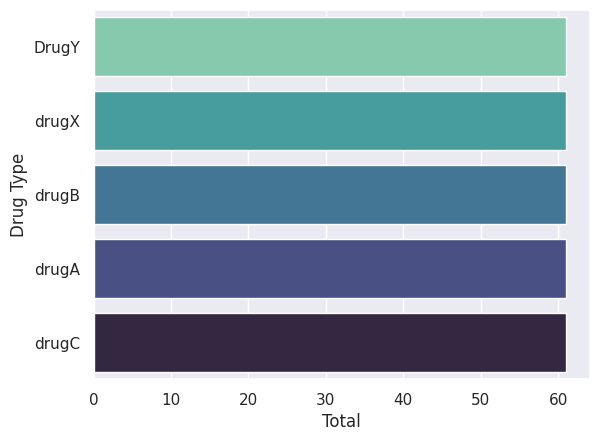

In [65]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

**the distrubtion of drug type are now balanced**

**Models**

**1. Logistic Regression**

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       DrugY       0.88      0.70      0.78        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.79      0.83      0.81        18

    accuracy                           0.80        60
   macro avg       0.76      0.91      0.82        60
weighted avg       0.82      0.80      0.80        60

[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 3  0  0  0 15]]
Logistic Regression accuracy is: 80.00%


**2. K Neighbours**

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       DrugY       0.86      0.63      0.73        30
       drugA       0.40      0.80      0.53         5
       drugB       0.50      0.67      0.57         3
       drugC       0.33      0.50      0.40         4
       drugX       0.83      0.83      0.83        18

    accuracy                           0.70        60
   macro avg       0.59      0.69      0.61        60
weighted avg       0.76      0.70      0.72        60

[[19  3  1  4  3]
 [ 0  4  1  0  0]
 [ 0  1  2  0  0]
 [ 2  0  0  2  0]
 [ 1  2  0  0 15]]
K Neighbours accuracy is: 70.00%


**3. Support Vector Machine (SVM)**

In [68]:
from sklearn.svm import SVC
model = SVC(kernel='linear', max_iter=251)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       DrugY       0.85      0.77      0.81        30
       drugA       1.00      0.20      0.33         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.82        60
   macro avg       0.82      0.79      0.74        60
weighted avg       0.84      0.82      0.80        60

[[23  0  1  2  4]
 [ 4  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
SVC accuracy is: 81.67%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**4. Naive Bayes (Categorical NB):**

In [69]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       DrugY       0.83      0.67      0.74        30
       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.78      0.78      0.78        18

    accuracy                           0.77        60
   macro avg       0.73      0.89      0.79        60
weighted avg       0.78      0.77      0.76        60

[[20  3  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 4  0  0  0 14]]
Naive Bayes accuracy is: 76.67%


**5. Naive Bayes (Gaussian NB):**

In [70]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       DrugY       0.64      0.90      0.75        30
       drugA       1.00      0.20      0.33         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       1.00      0.39      0.56        18

    accuracy                           0.70        60
   macro avg       0.81      0.70      0.66        60
weighted avg       0.79      0.70      0.67        60

[[27  0  1  2  0]
 [ 4  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [11  0  0  0  7]]
Gaussian Naive Bayes accuracy is: 70.00%


**6. Decision Tree:**

In [71]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_leaf_nodes=20)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.60      0.75        30
       drugA       0.50      1.00      0.67         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.80        60
   macro avg       0.75      0.92      0.79        60
weighted avg       0.87      0.80      0.80        60

[[18  5  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Decision Tree accuracy is: 80.00%


**7. Random Forest:**

In [72]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_leaf_nodes=30)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.67      0.80        30
       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.77      0.93      0.83        60
weighted avg       0.88      0.83      0.83        60

[[20  3  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 83.33%


**Model Comparison**

In [73]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree', 'Random Forest'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, NBAcc1*100, NBAcc2*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
6,Random Forest,83.333333
2,SVM,81.666667
0,Logistic Regression,80.000000
5,Decision Tree,80.000000
3,Categorical NB,76.666667
1,K Neighbors,70.000000
4,Gaussian NB,70.000000


<Axes: xlabel='Model'>

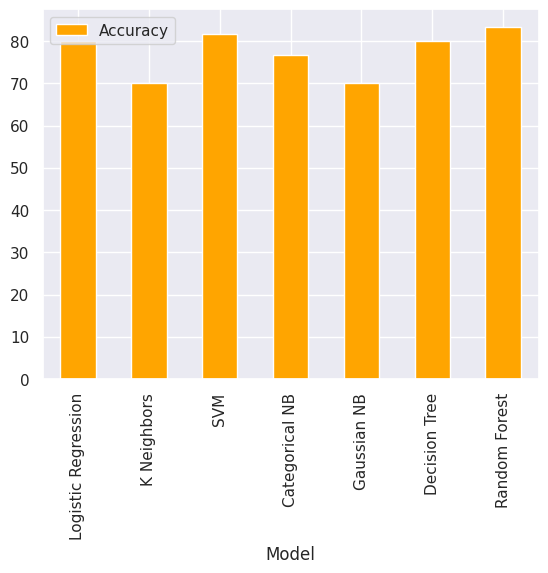

In [84]:
compare.plot(x='Model', y='Accuracy', kind='bar', color='orange')

**From the comparison plot, among the 7 ML models, Random Forest had achieved the highest accuracy of 83.33%.**